In [1]:
import xml.etree.ElementTree as ET 
import numpy as np
import matplotlib.pyplot as plt

import errors
import extract_observables
from plotting_envir import Plotter

In [2]:
data_path = "/home/lqcd/brian137/chroma_Wloops/gpu_test/wflow_to_0.5/data/"
wloop_size = np.array(range(1, 14))
smoothing = [0, 0.1, 0.3, 0.5]
data = []
for i in wloop_size:
    obj = extract_observables.Data_Processing(data_path, start_time = [i,i,i,i])
    obj.file1 = 2450
    obj.off_axis = True
    data.append(obj)

for i in data: i.read_all_files()
values = np.array([i.find_potential_errors() for i in data])
r = data[0].r


# Fitting

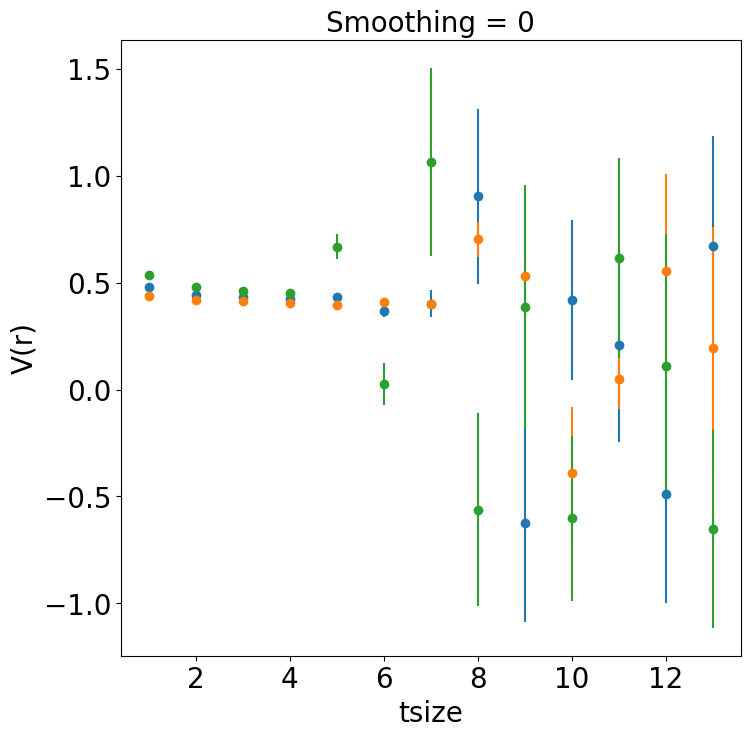

In [3]:
which_smoothing = 0
plotter = Plotter(f"Smoothing = {smoothing[which_smoothing]}", "tsize", "V(r)"); ax = plotter.ax
for r in [7, 8, 9]:
    ax.errorbar(wloop_size, values[:,which_smoothing][:,0][:,r],yerr = values[:,which_smoothing][:,1][:,r], fmt = 'o')

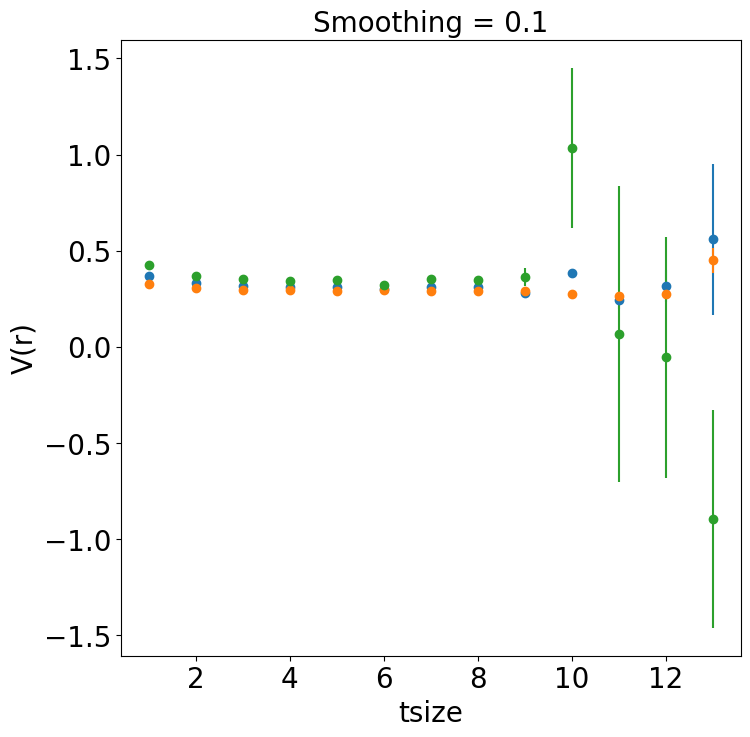

In [5]:
which_smoothing = 1
plotter = Plotter(f"Smoothing = {smoothing[which_smoothing]}", "tsize", "V(r)"); ax = plotter.ax
for r in [7, 8, 9]:
    ax.errorbar(wloop_size, values[:,which_smoothing][:,0][:,r],yerr = values[:,which_smoothing][:,1][:,r], fmt = 'o')

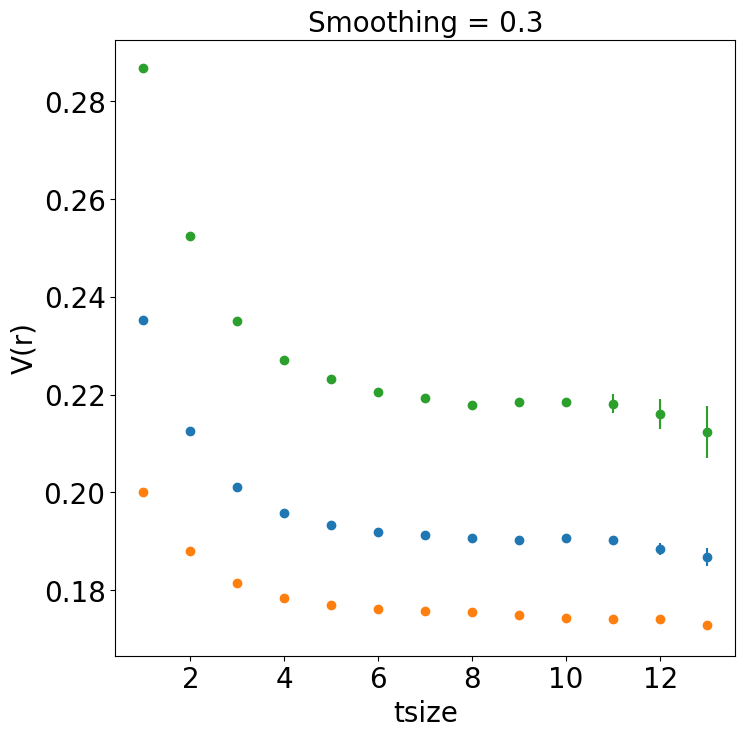

In [4]:
which_smoothing = 2
plotter = Plotter(f"Smoothing = {smoothing[which_smoothing]}", "tsize", "V(r)"); ax = plotter.ax
for r in [7,8,9]:
    ax.errorbar(wloop_size , values[:,which_smoothing][:,0][:,r],yerr = values[:,which_smoothing][:,1][:,r], fmt = 'o')

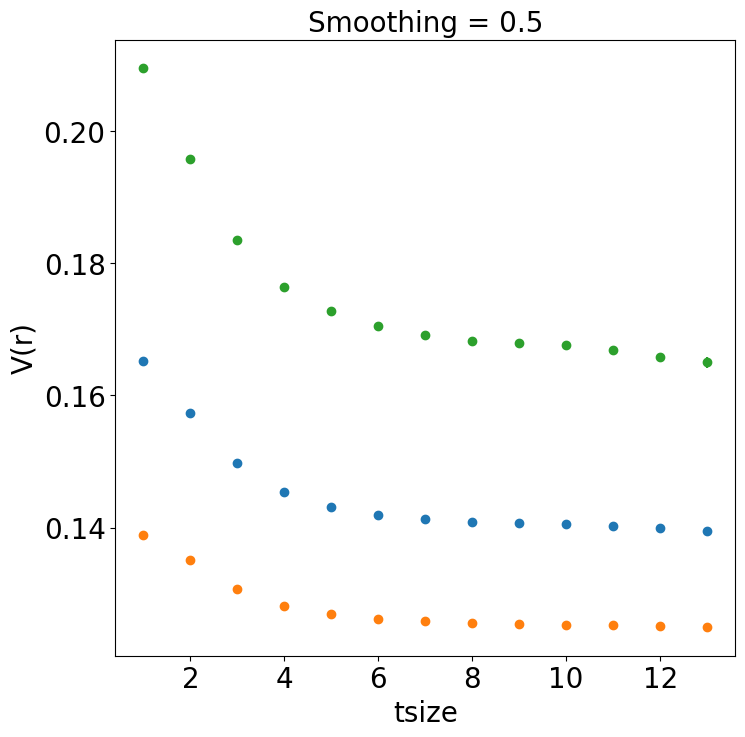

In [6]:
which_smoothing = 3
plotter = Plotter(f"Smoothing = {smoothing[which_smoothing]}", "tsize", "V(r)"); ax = plotter.ax
for r in [7,8,9]:
    ax.errorbar(wloop_size, values[:,which_smoothing][:,0][:,r],yerr = values[:,which_smoothing][:,1][:,r], fmt = 'o')


# Matching scheme

In [24]:
data_path = "/home/lqcd/brian137/chroma_Wloops/gpu_test/wflow_to_0.5/data/"
smoothing = [0, 0.1, 0.3, 0.5]

#the whole range
start_time = [6, 10, 9, 10]
breakpts = [0, 8, 11, 15, 23]


data = extract_observables.Data_Processing(data_path, start_time = start_time)
data.file1 = 2450
data.off_axis = True
#data.off_axis = False
data.read_all_files()



In [26]:
potential = data.find_potential_errors()
force = data.find_force_errors()

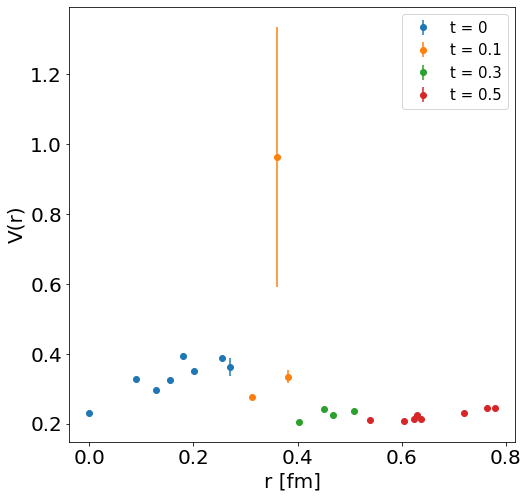

In [27]:
plotter = Plotter(f"", "r [fm]", "V(r)"); ax = plotter.ax
for i in range(0, 4):
    ax.errorbar(data.r[breakpts[i]:breakpts[i+1]]*0.09, 
                potential[i][0][breakpts[i]:breakpts[i+1]], 
                yerr = potential[i][1][breakpts[i]:breakpts[i+1]], 
                fmt = "o", label = f"t = {smoothing[i]}")

plotter.show_legend()
#Wat